## `Classification`

In this project, We are going to use `Kaggle` [Titanic](https://www.kaggle.com/c/titanic) Competition dataset for classification task. 

### `About Titanic`

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this project, We are going to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### `Data Dictionary`

| Variable | Definition | Key |
|---|---|---|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket Class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |   |
| Age | Age in years |   |
| sibsp | # of siblings / spouses aboard the Titanic |   |
| parch | # of parents / children aboard the Titanic |   |
| ticket | Ticket number |   |
| fare | Passenger fare |   |
| cabin | Cabin number |   |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

## `Importing Required Libraries`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style='white', context='notebook', palette='deep')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
IDtest = test["PassengerId"]

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have 891 observations & 12 columns. See the mix of variable types.

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We have 417 observations & 11 columns (no response 'Survived' column).

## `Exploratory Data Analysis`

Let's start with finding the number of missing values. If you compare the output you will see that missing value percentages do not vary much across train and test dataset.

In [5]:
# Check missing values in train dataset
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
miss_train = pd.DataFrame({'Train Missing Ratio' :train_na})
miss_train.head()

,Train Missing Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


In [6]:
# Check missing values in test dataset
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
miss_test = pd.DataFrame({'Test Missing Ratio' :test_na})
miss_test.head()

,Test Missing Ratio
Cabin,78.229665
Age,20.574163
Fare,0.239234


In [7]:
# Fill empty and NaNs values with NaN
train = train.fillna(np.nan)
test = test.fillna(np.nan)

#### PassengerId

Not relevant from modeling perspective so we will drop this variable later.

#### Pclass

Pclass is categorical variable. Let's look at the distribution.

,Survived
Pclass,
3,491
1,216
2,184


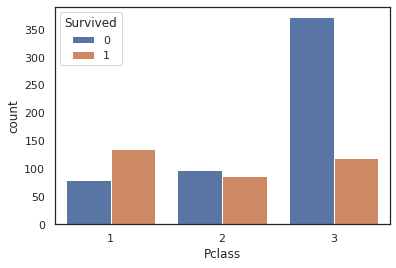

In [8]:
# Analyze the count of survivors by Pclass
ax = sns.countplot(x="Pclass", hue="Survived", data=train)
train[['Pclass', 'Survived']].groupby(['Pclass']).count().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


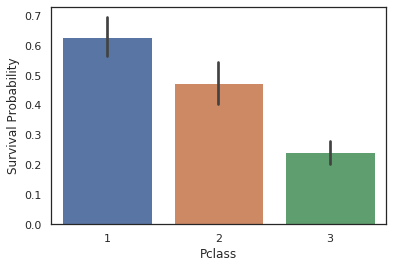

In [9]:
# Analyze the Survival Probability by Pclass
g = sns.barplot(x="Pclass", y="Survived", data=train)
g = g.set_ylabel("Survival Probability")
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

Approximately 62% of Pclass = 1 passenger survived followed by 47% of Pclass2.

#### Name

Not relevant from analysis & modeling perspective. We will drop this feature later after creating a new variable as Title.

#### Sex

Based on analysis below, female had better chances of survival.

,Survived
Sex,
male,577
female,314


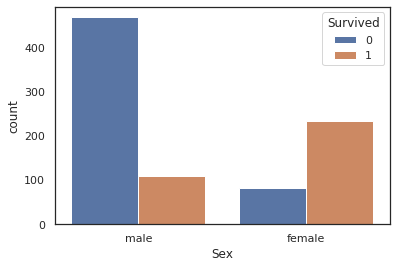

In [10]:
# Count the number of passengers by gender
ax = sns.countplot(x="Sex", hue="Survived", data=train)
# Analyze survival count by gender
train[["Sex", "Survived"]].groupby(['Sex']).count().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


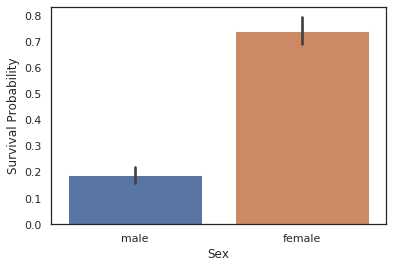

In [11]:
# Analyze the Survival Probability by Gender
g = sns.barplot(x="Sex", y="Survived", data=train)
g = g.set_ylabel("Survival Probability")
train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

Based on data above, female passengers had better chances of survival than male passengers.

#### Age

The insight below connects back to "Ladies and Kids First" scene of the movie. It shows that a good number of babies & young kids survived.

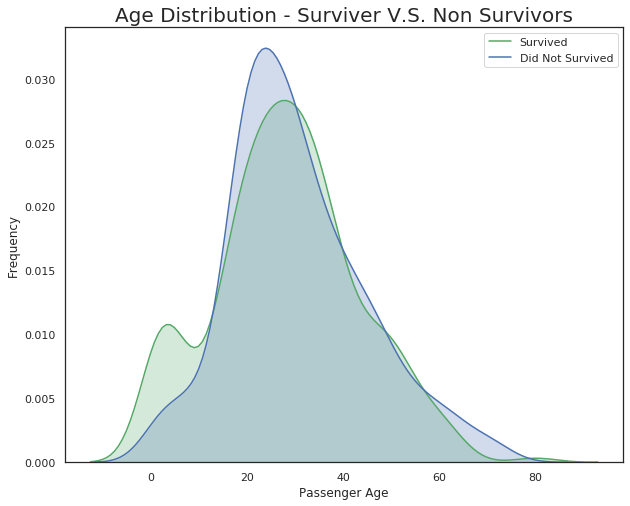

In [12]:
# Let's explore the distribution of age by response variable (Survived)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'], color='g', shade=True, label='Survived')
axis = sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'], color='b', shade=True, label='Did Not Survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 20)
plt.xlabel("Passenger Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

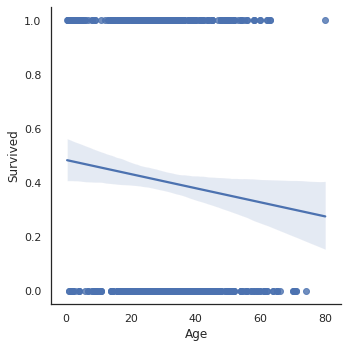

In [13]:
# We can also say that the older the passenger the lesser the chance of survival.

sns.lmplot('Age', 'Survived', data=train)

#### SibSP

This variable refers to number of siblings/spouse onboard. SibSP = 1 and SibSP = 2 shows higher chances of survival.

,Survived
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


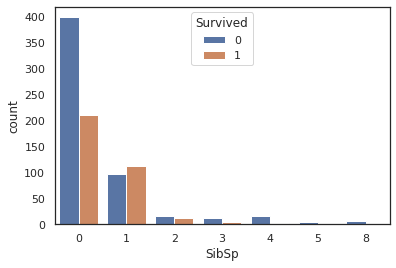

In [14]:
# Analyze the count of survivors by SibSP

ax = sns.countplot(x="SibSp", hue="Survived", data=train)
train[['SibSp', 'Survived']].groupby(['SibSp']).count().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


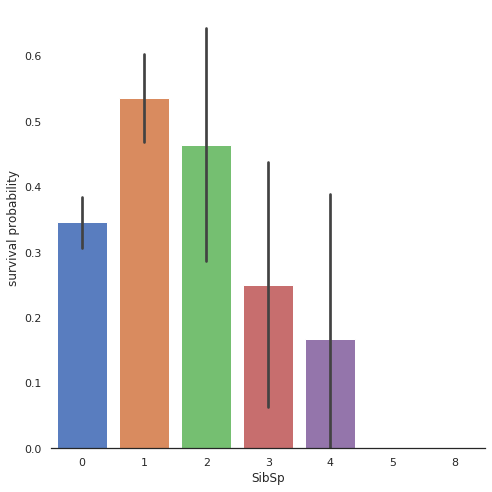

In [15]:
# Analyze probability of survival by SibSP
g  = sns.factorplot(x="SibSp", y="Survived", data=train, kind="bar", size=7, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

#### Parch

Parch indicates number of parents / children aboard the Titanic. Note that Parch = 3 and Parch = 1 shows higher survival probabilities.

,Survived
Parch,
0,678
1,118
2,80
3,5
5,5
4,4
6,1


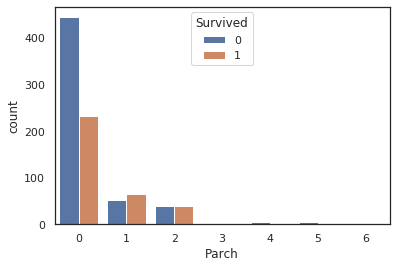

In [16]:
# Analyze the count of survivors by Parch

ax = sns.countplot(x="Parch", hue="Survived", data=train)
train[['Parch', 'Survived']].groupby(['Parch']).count().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


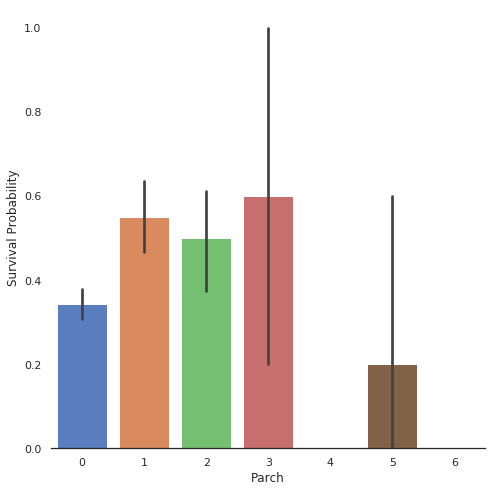

In [17]:
# Analyze the Survival Probability by Parch
g  = sns.factorplot(x="Parch", y="Survived", data=train, kind="bar", size=7, palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

#### Ticket

This variable has alphanumeric value which might not be related to Survival directly but we can use this variable to create some additional features.

In [18]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

#### Fare

Let's check the distribution first.


 mu = 32.20 and sigma = 49.67



Text(0.5, 1.0, 'Fare distribution')

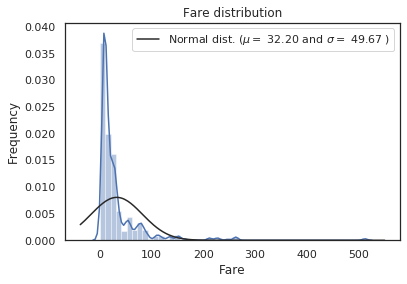

In [19]:
from scipy import stats
from scipy.stats import norm, skew # for some statistics
sns.distplot(train['Fare'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

The Fare variable is right skewed. We need to transform this variable using log function and make it more normally distributed. We will do this during feature engineering process.

#### Cabin

Alphanumeric variable.

687 missing values in train & 327 missing values in test data - which needs to be treated. We can create more features using this Cabin variable.

In [20]:
# Let's check the unique values
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

#### Embarked

C = Cherbourg, Q = Queenstown, S = Southampton

Let's explore the variable with Survival rate. Embarked represents port of embarkation. As the analysis output below suggests Emabrked C shows high probabilities of survival.

,Survived
Embarked,
S,644
C,168
Q,77


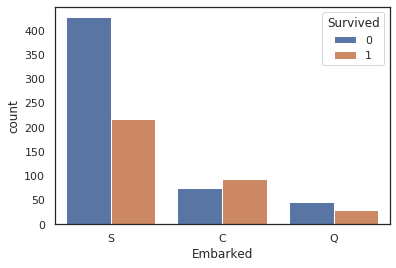

In [21]:
# Analyze the count of survivors by Embarked variable

ax = sns.countplot(x="Embarked", hue="Survived", data=train)
train[['Embarked', 'Survived']].groupby(['Embarked']).count().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


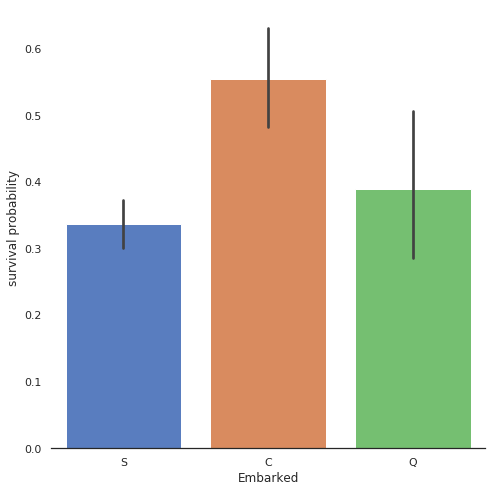

In [22]:
# Analyze the Survival Probability by Embarked

g = sns.factorplot(x="Embarked", y="Survived", data=train, kind="bar", size=7, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["Embarked", "Survived"]].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

#### Additional Analysis

Let's create few additional charts to see how different variables are related.

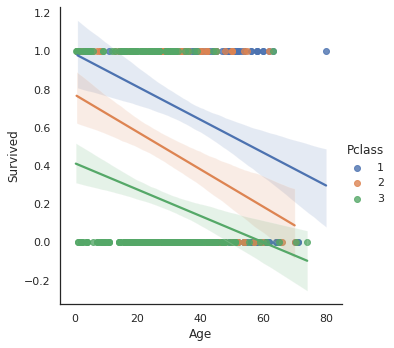

In [23]:
# Age, Pclass & Survival

sns.lmplot('Age', 'Survived', data=train, hue='Pclass')

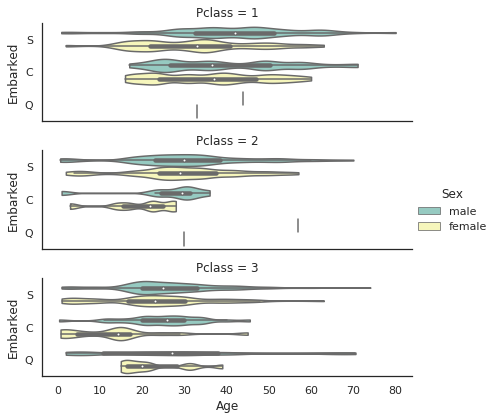

In [24]:
# Age, Embarked, Sex, Pclass

ax = sns.catplot(x="Age", y="Embarked",  hue="Sex", row="Pclass",   data=train[train.Embarked.notnull()], 
orient="h", height=2, aspect=3, palette="Set3",  kind="violin", dodge=True, cut=0, bw=.2)

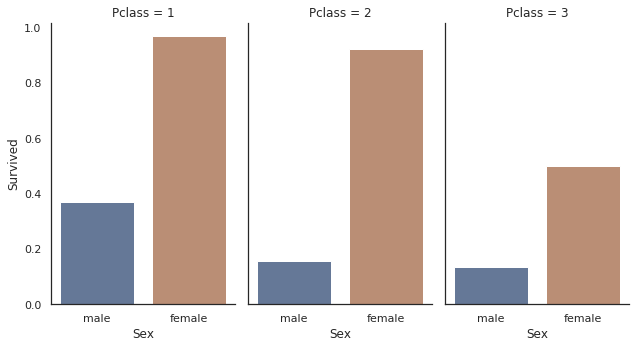

In [25]:
# Relation among Pclass, Gender & Survival Rate

ax = sns.catplot(x="Sex", y="Survived", col="Pclass", data=train, saturation=.5, kind="bar", ci=None, aspect=.6)

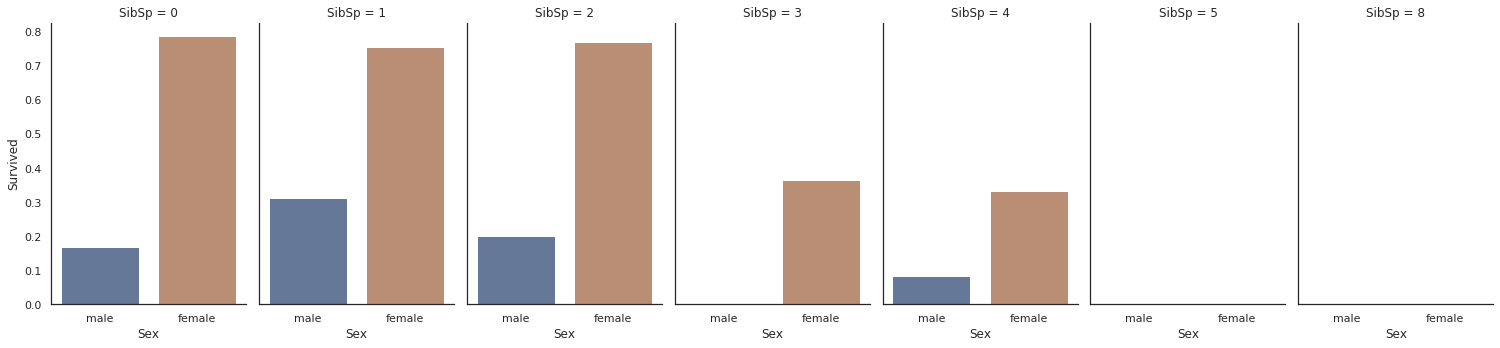

In [26]:
# Relation among SibSP, Gender & Survival Rate

ax = sns.catplot(x="Sex", y="Survived", col="SibSp", data=train, saturation=.5, kind="bar", ci=None, aspect=.6)

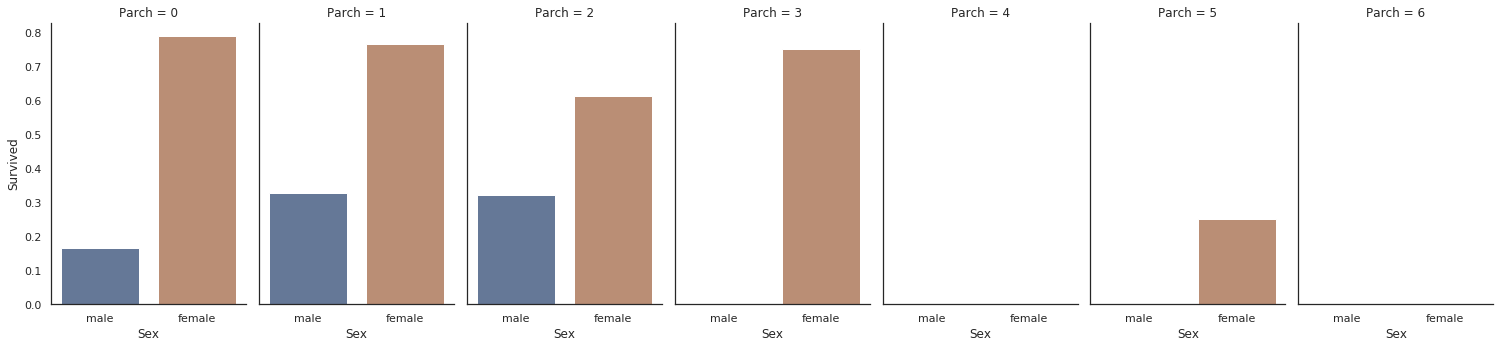

In [27]:
# Relation among Parch, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="Parch", data=train, saturation=.5, kind="bar", ci=None, aspect=.6)

## `Feature Engineering`

What we need to do to process following variables -

PassengerID - No action required

PClass - Have only 3 numerical values. We will use it as it is.

Name - Can be used to create new variable Title by extracting the salutation from name.

Sex - Create dummy variables

Age - Missing value treatment, followed by creating dummy variables

SibSP - Drop the variable

Parch - Drop the variable as most of the values are 0

Ticket - Create dummy variables post feature engineering

Fare - Missing value treatment followed by log normalization

Cabin - Create dummy variables post feature engineering

Embarked - Create dummy variables

In [28]:
# Let's combining train & test for quick feature engineering. 
# Variable source is a kind of tag which indicates data source in combined data

train['source']='train'
test['source']='test'
combdata = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, combdata.shape)

(891, 13) (418, 12) (1309, 13)


### `PassengerID`

In [29]:
# PassengerID - Drop PassengerID
combdata.drop(labels = ["PassengerId"], axis = 1, inplace = True)

### `Pclass`

In [30]:
# Pclass 
combdata['Pclass'].unique()

array([3, 1, 2])

### `Name`

In [31]:
# Name - Extract Salutation from Name variable

salutation = [i.split(",")[1].split(".")[0].strip() for i in combdata["Name"]]
combdata["Title"] = pd.Series(salutation)
combdata["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
Capt              1
Lady              1
Sir               1
Mme               1
Don               1
the Countess      1
Dona              1
Name: Title, dtype: int64

### `Title`

In [32]:
# Name - Create 5 major categories & analyze the survival rate

combdata['Title'] = combdata['Title'].replace('Mlle', 'Miss')
combdata['Title'] = combdata['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
combdata.Title.loc[ (combdata.Title !=  'Master') & (combdata.Title !=  'Mr') & 
                   (combdata.Title !=  'Miss')  & (combdata.Title !=  'Mrs')] = 'Others'
combdata["Title"].value_counts()

Mr        757
Miss      262
Mrs       201
Master     61
Others     28
Name: Title, dtype: int64

In [33]:
# Inspect the correlation between Title and Survived
combdata[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.796875
4,Others,0.318182


In [34]:
# Create dummy variable 
combdata = pd.get_dummies(combdata, columns = ["Title"])

### `Fare`

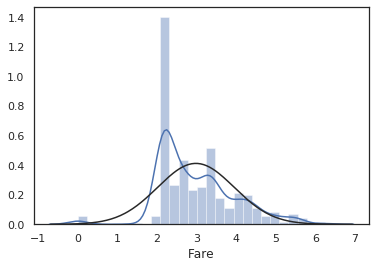

In [35]:
# Fare - Check the number of missing value
combdata["Fare"].isnull().sum()

# Only 1 value is missing so we will fill the same with median
combdata["Fare"] = combdata["Fare"].fillna(combdata["Fare"].median())

# Use the numpy fuction log1p which  applies log(1+x) to all elements of the column
combdata["Fare"] = np.log1p(combdata["Fare"])

# Check the new distribution 
sns.distplot(combdata['Fare'] , fit=norm);

In [36]:
# bin Fare into five intervals with equal amount of people
combdata['Fare-bin'] = pd.qcut(combdata.Fare,5,labels=[1,2,3,4,5]).astype(int)

# inspect the correlation between Fare-bin and Survived
combdata[['Fare-bin', 'Survived']].groupby(['Fare-bin'], as_index=False).mean()

,Fare-bin,Survived
0,1,0.217877
1,2,0.201087
2,3,0.426901
3,4,0.443243
4,5,0.645349


### `Age`

There are 2 ways of handling the missing age values.

* Fill the age with median age of similar rows according to Sex, Pclass, Parch & SibSP
* OR use a quick machine learning algorithm to predict the age values based on Age, Title, Fare & SibSP

I used both of them to test which one works better. One of the code will be markdown to avoid confusion.

This section of code is for missing value treatment for age. Instead of directly replacing the missing values with the median value of complete data, the script looks for nearby data which is similar in terms of Sex, Pclass, Parch and SibSp and then takes the median values of those observations.

For example, if my salary information is missing, you can't simply replace the missing value with median salary of my whole organization. You will look for people with similar experience, type of work, department, etc and then will use the median salary of such a group.

In [37]:
## Fill Age with the median age of similar rows according to Sex, Pclass, Parch and SibSp
# Index of NaN age rows
# missing_index = list(combdata["Age"][combdata["Age"].isnull()].index)

# for i in missing_index :
#     median_age = combdata["Age"].median()
#     filled_age = combdata["Age"][((combdata['Sex'] == combdata.iloc[i]["Sex"]) & 
#                                 (combdata['SibSp'] == combdata.iloc[i]["SibSp"]) & 
#                                 (combdata['Parch'] == combdata.iloc[i]["Parch"]) & 
#                                 (combdata['Pclass'] == combdata.iloc[i]["Pclass"]))].median()
#     if not np.isnan(filled_age) :
#         combdata['Age'].iloc[i] = filled_age
#     else :
#         combdata['Age'].iloc[i] = median_age

#### `Second approach to treat the Age feature`

In [38]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
combdata_temp = combdata[['Age','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Others','Fare-bin','SibSp']]

X  = combdata_temp.dropna().drop('Age', axis=1)
Y  = combdata['Age'].dropna()
holdout = combdata_temp.loc[np.isnan(combdata.Age)].drop('Age', axis=1)

regressor = RandomForestRegressor(n_estimators = 300)
#regressor = GradientBoostingRegressor(n_estimators = 500)
regressor.fit(X, Y)
y_pred = np.round(regressor.predict(holdout),1)
combdata.Age.loc[combdata.Age.isnull()] = y_pred

combdata.Age.isnull().sum(axis=0)

0

In [39]:
bins = [ 0, 4, 12, 18, 30, 50, 65, 100] # This is somewhat arbitrary...
age_index = (1,2,3,4,5,6,7)

combdata['Age-bin'] = pd.cut(combdata.Age, bins, labels=age_index).astype(int)
combdata[['Age-bin', 'Survived']].groupby(['Age-bin'],as_index=False).mean()

,Age-bin,Survived
0,1,0.675000
1,2,0.452381
2,3,0.402597
3,4,0.315789
4,5,0.427083
5,6,0.375000
6,7,0.125000


### `Sex`

In [40]:
# Sex - Create dummy variables
combdata["Sex"] = combdata["Sex"].map({"male": 0, "female":1}) 

# combdata = pd.get_dummies(combdata, columns = ["Sex"])

### `Creating Family Size variable using SibSp & Parch`

In [41]:
# Create a variable representing family size from SibSp and Parch
combdata["Fsize"] = combdata["SibSp"] + combdata["Parch"] + 1

# Analyze the correlation between Family and Survived
combdata[['Fsize', 'Survived']].groupby(['Fsize'], as_index=False).mean()

# Create new feature of family size
# combdata['Single'] = combdata['Fsize'].map(lambda s: 1 if s == 1 else 0)
# combdata['SmallF'] = combdata['Fsize'].map(lambda s: 1 if  s == 2  else 0)
# combdata['MedF'] = combdata['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
# combdata['LargeF'] = combdata['Fsize'].map(lambda s: 1 if s >= 5 else 0)

,Fsize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


,Survived
Fsize,
4,0.724138
3,0.578431
2,0.552795
1,0.303538
0,0.161290


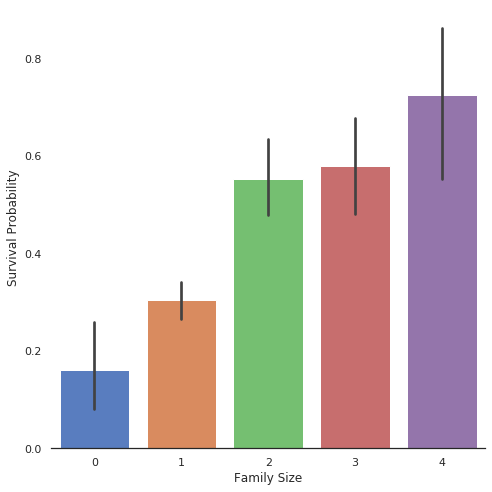

In [42]:
# Analyze the Survival Probability by Fsize

combdata.Fsize = combdata.Fsize.map(lambda x: 0 if x > 4 else x)
g  = sns.factorplot(x="Fsize", y="Survived", data=combdata, kind="bar", size = 7, palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
g = g.set_xlabels("Family Size")
combdata[["Fsize", "Survived"]].groupby(['Fsize']).mean().sort_values(by='Survived', ascending=False)

### `SibSp`

In [43]:
# SibSp - Drop the variable
combdata = combdata.drop(labels='SibSp', axis=1)

### `Parch`

In [44]:
# Parch - Drop the variable
combdata = combdata.drop(labels='Parch', axis=1)

### `Ticket`

Tickets are of 2 types here.

Type 1 has only number and Type 2 is a combination of some code followed by the number. Let's extract the first digit and compare it with survival probability.

In [45]:
# Ticket - Extracting the ticket prefix. This might be a representation of class/compartment.

combdata.Ticket = combdata.Ticket.map(lambda x: x[0])

# inspect the correlation between Ticket and Survived
combdata[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [46]:
# Let's look at the number of people for each type of tickets
combdata['Ticket'].value_counts()

3    429
2    278
1    210
P     98
S     98
C     77
A     42
W     19
F     13
7     13
4     11
6      9
L      5
5      3
8      2
9      2
Name: Ticket, dtype: int64

Most of these tickets belong to category 1, 2, 3, S, P, C. Based on value counts and average survival, we can put all other ticket categories into a new category '4'.

In [47]:
combdata['Ticket'] = combdata['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

# check the correlation again
combdata[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.166667
4,C,0.340426
5,P,0.646154
6,S,0.323077


In [48]:
# Create dummy variables
combdata = pd.get_dummies(combdata, columns = ["Ticket"], prefix="T")

### `Cabin`

In [49]:
# Cabin - Replace the missing Cabin number by the type of cabin unknown 'U'
combdata["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'U' for i in combdata['Cabin'] ])

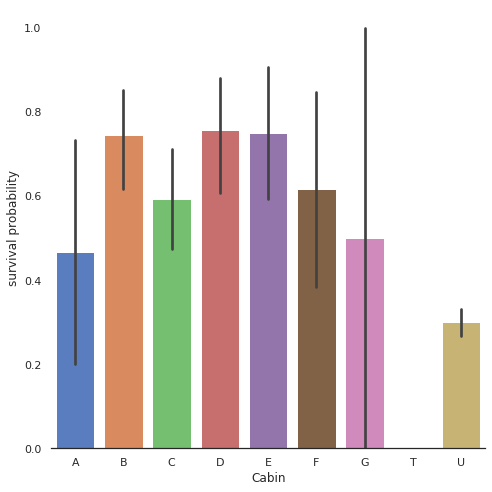

In [50]:
# Let's plot the survival probability by Cabin
g  = sns.factorplot(x="Cabin",y="Survived",data=combdata,kind="bar", size = 7 ,
                    palette = "muted",order=['A','B','C','D','E','F','G','T','U'])
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [51]:
combdata = combdata.drop(labels='Cabin', axis=1)

### `Embarked`

In [52]:
combdata = combdata.drop(labels='Embarked', axis=1)

In [53]:
# Drop the variables we don't need

combdata = combdata.drop(labels=['Age', 'Fare', 'Name'], axis=1)

In [54]:
combdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Pclass        1309 non-null   int64  
 2   Sex           1309 non-null   int64  
 3   source        1309 non-null   object 
 4   Title_Master  1309 non-null   uint8  
 5   Title_Miss    1309 non-null   uint8  
 6   Title_Mr      1309 non-null   uint8  
 7   Title_Mrs     1309 non-null   uint8  
 8   Title_Others  1309 non-null   uint8  
 9   Fare-bin      1309 non-null   int64  
 10  Age-bin       1309 non-null   int64  
 11  Fsize         1309 non-null   int64  
 12  T_1           1309 non-null   uint8  
 13  T_2           1309 non-null   uint8  
 14  T_3           1309 non-null   uint8  
 15  T_4           1309 non-null   uint8  
 16  T_C           1309 non-null   uint8  
 17  T_P           1309 non-null   uint8  
 18  T_S           1309 non-null 

## `Creating a Model`

In [55]:
# Import the required libraries
from sklearn.svm import SVC
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

In [56]:
## Separate train dataset and test dataset using the index variable 'source'

train = combdata.loc[combdata['source']=="train"]
test = combdata.loc[combdata['source']=="test"]
test.drop(labels=["Survived"], axis = 1, inplace=True)
train.drop(labels=["source"], axis = 1, inplace=True)
test.drop(labels=["source"], axis = 1, inplace=True)

# You may want to drop some variables to avoid dummy variable trap
# test.drop(labels=['source','Sex_male', 'Fsize', 'LargeF', 'SibSp_8','Parch_9','T_WEP','Cabin_T','Emb_Q'],axis = 1,inplace=True)
test.shape

(418, 17)

In [57]:
## Separate train features and label 

train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"], axis = 1)

# You may want to drop some variables to avoid dummy variable trap
# X_train = train.drop(labels = ["Survived", 'Sex_male', 'Fsize', 'LargeF', 'SibSp_8','Parch_9','T_WEP','Cabin_T','Emb_Q'],axis = 1)
X_train.shape

(891, 17)

## `Cross Validation Strategy`

Cross Validation is one of the most powerful tool in Data Scientist's tool box. It helps you to understand the performance of your model and fight with overfitting. As we all know that Learning the model parameters and testing it on the same data is a big mistake. Such a model would have learned everything about the training data and would give result in a near perfect test score as it has already seen the data. The same model would fail terribly when tested on unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

The general approach is as follows:

1. Split the dataset into k groups
1. For each unique group:
    * Kee one group as a hold out or test data set
    * Use the remaining groups as training data set
    * Build the model on the training set and evaluate it on the test set
    * Save the evaluation score 
1. Summarize the performance of the model using the sample of model evaluation scores

In [58]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

Now we have the training and test datasets available and we can start training the model. We will build couple of base models and then will use Grid Search method to optimize the parameters. There are several classification you can select. We are trying following to develop a baseline -

    1. K Nearest Neighbour
    2. Linear Discriminant Analysis
    3. Support Vector Classifier
    4. Multi-layer Perceptron classifier
    5. Extra Trees Classifier
    6. Logistic Regression
    7. Decision Trees
    8. Random Forest
    9. Gradient Boosting Classifier
    10. AdaBoost Classifier

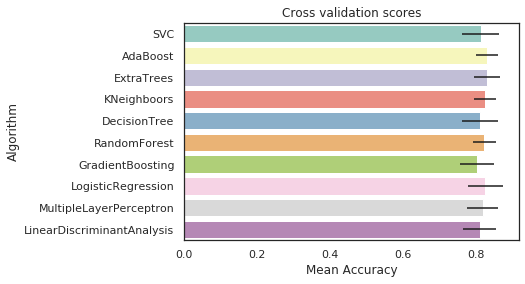

In [59]:
# Modeling differents algorithms. 

random_state = 2
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(SVC(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                      random_state=random_state, learning_rate=0.1))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold,
                                      n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["SVC",
                                    "AdaBoost",
                                    "ExtraTrees",
                                    "KNeighboors",
                                    "DecisionTree",
                                    "RandomForest",
                                    "GradientBoosting",
                                    "LogisticRegression",
                                    "MultipleLayerPerceptron",
                                    "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans", "Algorithm", data=cv_res, palette="Set3", orient = "h", **{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [60]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.812634,0.050194,SVC
1,0.829401,0.029233,AdaBoost
2,0.829388,0.035530,ExtraTrees
3,0.823795,0.030154,KNeighboors
4,0.810387,0.049292,DecisionTree
5,0.822697,0.032323,RandomForest
6,0.802534,0.046558,GradientBoosting
7,0.824981,0.047925,LogisticRegression
8,0.818202,0.042477,MultipleLayerPerceptron
9,0.809238,0.044762,LinearDiscriminantAnalysis


## `Model Evaluation`

Evaluating multiple models using GridSearch optimization method.

Hyper-parameters are key parameters that are not directly learnt within the estimators. We have to pass these as arguments. Different hyper parameters can result in different model with varying performance/accuracy. To find out what paparmeters are resulting in best score, we can use Grid Search method and use the optimum set of hyper parameters to build and select a good model.

A search consists of:

1. an estimator (regressor or classifier)
1. a parameter space;
1. a method for searching or sampling candidates;
1. a cross-validation scheme; and
1. a score function.

### `AdaBoost Classifier`

Adaboost begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [61]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                  "base_estimator__splitter" :   ["best", "random"],
                  "algorithm" : ["SAMME","SAMME.R"],
                  "n_estimators" :[1,2],
                  "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5]}

gsadaDTC = GridSearchCV(adaDTC, param_grid= ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,Y_train)
ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    4.5s finished


0.8081273408239701

### `ExtraTrees Classifier`

ET is a meta estimator that fits a number of randomized decision trees on various sub-samples of the dataset and then uses averaging method to improve the predictive accuracy and control over-fitting.

In [62]:
# ExtraTrees 
ExtC = ExtraTreesClassifier()

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC, param_grid=ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   22.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   58.4s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.2min finished


0.8361797752808989

### `Random Forest Classifier`

Similar to Extra Tree Classifier a Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

How ET differes from RF -

1) When choosing variables at a split, samples are drawn from the entire training set instead of a bootstrap sample of the training set.

2) Splits are chosen completely at random from the range of values in the sample at each split.

In [63]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   26.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.3min finished


0.8338951310861423

### `Gradient Boosting`

Gradient boosting is one of the most powerful techniques for building predictive models. Boosting is a method of converting weak learners into strong learners by building an additive model in a forward stage-wise fashion. In boosting, each new tree is a fit on a modified version of the original data set.

In [64]:
# Gradient boosting 
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   20.7s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   42.4s finished


0.8249937578027465

### `Support Vector Machines`

SVM builds a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize the error. The idea behind SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

In [65]:
# SVM classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(X_train,Y_train)
SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   19.2s finished


0.8361298377028714

Let's plot feature importance by various algorithms.

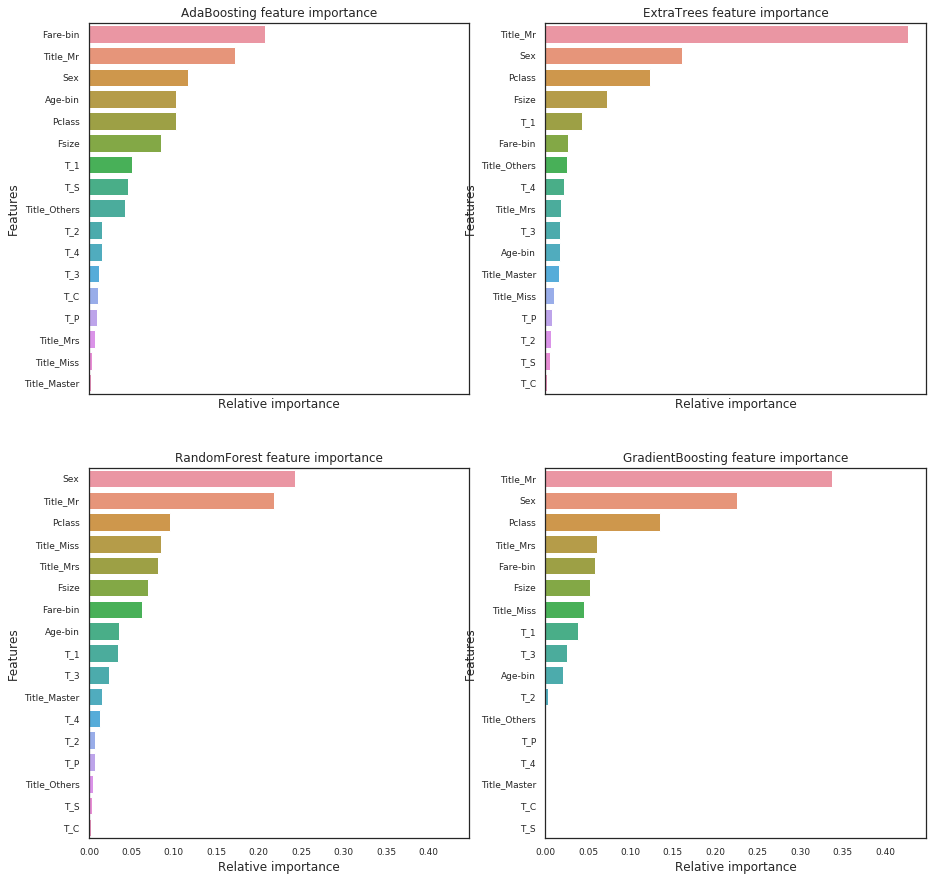

In [66]:
# Feature Importance
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),
                     ("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40], x=classifier.feature_importances_[indices][:40],
                        orient='h', ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

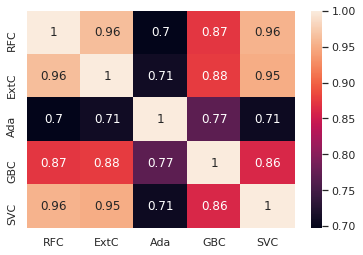

In [67]:
# Concatenate all classifier results
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")

ensemble_results = pd.concat([test_Survived_RFC, test_Survived_ExtC, test_Survived_AdaC, test_Survived_GBC,
                              test_Survived_SVMC], axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

### `Voting Classifier`

Voting is one of the simplest method of combining the predictions from multiple machine learning models. It is not an actual classifier but a wrapper for set of different ones that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm. Here we are combining the predictions from models that we built and predict based on votes.

In [68]:
# Use voting classifier to combine the prediction power of all models
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac', ada_best), ('gbc', GBC_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, Y_train)

In [69]:
# Predict and export the results
test_Survived = pd.Series(votingC.predict(test), name="Survived")
results = pd.concat([IDtest, test_Survived], axis=1)
results.to_csv("Final Submission File.csv", index=False)

## `Conclusion`

Title, Sex_Female, Fare & PClass seems to be common features preferred for classification.

While Title & Age feature represents the Age category of passengers the features like Fare, PClass, Cabin etc. represents the economic status. Based on findings we can conclude that Age, Gender & features representing social/economic status were primary factors affecting the survival of passenger.